In [1]:
!uv pip install pandas beautifulsoup4 

Resolved 9 packages in 613ms
Installed 4 packages in 8.70s
 + numpy==2.3.2
 + pandas==2.3.2
 + pytz==2025.2
 + tzdata==2025.2


In [2]:
!uv pip install aiofiles Pillow

Resolved 2 packages in 435ms
Installed 2 packages in 716ms
 + aiofiles==24.1.0
 + pillow==11.3.0


In [3]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Mobalitics Data

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',}
url = "https://mobalytics.gg/lol/champions"

In [5]:
response = requests.get(url, headers=headers)

In [6]:
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title data-rh="true">All 171 LoL Champions: Builds, Guides, Counters &amp; More</title><link crossorigin="" href="https://cdn.mobalytics.gg" rel="preconnect"/><link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#2b2b2d" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><link href="/favicon/favicon.ico" rel="shortcut icon"/><meta content="#2b2b2d" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#2b2b2d" name="theme-color"/><meta name="mobalytics-in-game-overlay-marker"/><meta content="HoFwbZB-YAfW6iNPS3VdM2b

In [7]:
soup.find_all("a", href=True)

[<a class="x78zum5 xkuygi9 m-1gtwhu9" data-google-interstitial="false" href="/lol"><img alt="Mobalytics" class="m-1laa4zm" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/mobalytics-logo/logo-mobalytics-expanded-fixed.svg"/></a>,
 <a data-google-interstitial="false" href="https://mobalytics.gg/lol"><div class="xxzb6uj"><div class="x78zum5 x6s0dn4 x1nhvcw1 x14atkfc x5yr21d xdqdrvq x12oqio5 xf0wp53 x1m7wjq6"><img alt="League of Legends" class="x1kky2od xlup9mm x1db2dqx" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/ngf-games/lol-filled.svg?v1" style="filter:brightness(0) saturate(100%) invert(92%) sepia(58%) saturate(2719%) hue-rotate(318deg) brightness(94%) contrast(102%)"/><div class="x19jf9pv x1g1qkmr">LoL</div></div></div></a>,
 <a data-google-interstitial="false" href="https://mobalytics.gg/tft"><div class="xxzb6uj"><div class="x78zum5 x6s0dn4 x1nhvcw1 x14atkfc x5yr21d xdqdrvq x12oqio5 xfj9a5l"><img alt="Teamfight Tactics" class="x1kky2od xlup9m

    <a href="/lol/champions/aatrox/build"><div class="m-12dr3gi" style="background-color:rgba(56, 198, 244, 0.2);border:1px solid var(--general-blue-200)"><div class="m-1dxseyi"><img alt="Fighter" class="m-ku5kie" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg"/></div><div class="m-lt7hb0" role="img"><span><img alt="" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04"/></span></div><div class="m-123baga">Aatrox</div><div class="m-am8tfa">the Darkin Blade</div><div class="m-s5xdrg"><div class="m-1tzbmhk" style="border-color:#fd7200"></div><p class="m-1nj5h5j">Hard</p></div><div class="m-1pr649u"><img alt="Top" class="m-3ygx5n" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg"/></div></div></a>,

In [8]:
type(soup.find_all("a", href=True))

bs4.element.ResultSet

In [9]:
len(soup.find_all("a", href=True))

205

In [10]:
type(soup.find_all("a", href=True)[0])

bs4.element.Tag

In [11]:
count=0
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        count+=1
count

172

Currently there are 171 champions. So one is redudndant.

In [12]:
count=0
for a in soup.find_all("a", href=True):
    if count < 5:
        if a["href"].startswith("/lol/champions/"):
            print(a)
            print()
            count+=1

<a href="/lol/champions/yunara/build">last new champion</a>

<a href="/lol/champions/aatrox/build"><div class="m-12dr3gi" style="background-color:rgba(56, 198, 244, 0.2);border:1px solid var(--general-blue-200)"><div class="m-1dxseyi"><img alt="Fighter" class="m-ku5kie" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg"/></div><div class="m-lt7hb0" role="img"><span><img alt="" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04"/></span></div><div class="m-123baga">Aatrox</div><div class="m-am8tfa">the Darkin Blade</div><div class="m-s5xdrg"><div class="m-1tzbmhk" style="border-color:#fd7200"></div><p class="m-1nj5h5j">Hard</p></div><div class="m-1pr649u"><img alt="Top" class="m-3ygx5n" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg"/></div></div></a>

<a href="/lol/champions/ahri/build"><div class="m-12dr3gi"><div class="m-1dxseyi"><img a

The newly added champion seems a bit off:

    <a href="/lol/champions/yunara/build">last new champion</a>

In [13]:
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        print(a['href'])
        break

/lol/champions/yunara/build


In [14]:
champ_names=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        champ_names.append(a.find("div", class_="m-123baga"))

champ_names[:5]

[None,
 <div class="m-123baga">Aatrox</div>,
 <div class="m-123baga">Ahri</div>,
 <div class="m-123baga">Akali</div>,
 <div class="m-123baga">Akshan</div>]

In [15]:
champ_names=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.find("div", class_="m-123baga")
        if tag:
            champ_names.append(tag.get_text(strip=True))

champ_names[:5]

['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar']

In [16]:
champ_classes=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.select_one("div.m-1dxseyi img")
        if tag:
            champ_classes.append(tag.get("alt"))

champ_classes[:5]

['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank']

In [17]:
champ_img=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.select_one("div.m-lt7hb0 img")
        if tag:
            champ_img.append(tag.get("src"))

champ_img[:5]

['https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/ahri.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/akali.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/akshan.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/alistar.png?v04']

Image: Aatrox,
URL: https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04


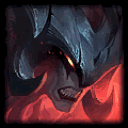

In [18]:
from IPython.display import Image, display

for i, img_url in enumerate(champ_img[:1]):
    print(f"Image: {champ_names[i]},\nURL: {img_url}")
    try:
        img_response = requests.get(img_url, headers=headers, stream=True)
        if img_response.status_code == 200:
            display(Image(data=img_response.content))
    except:
        continue

### Combined Functions

In [19]:
champ_names=[]
champ_titles=[]
champ_classes=[]
champ_imgs=[]
champ_pages=[]

# The comparison is implemented due to some lists, like 'champ_pages', containing more values than expected
# See the '<a href="/lol/champions/yunara/build">last new champion</a>' element mentioned further above

for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        
        champ_title_tag = a.find("div", class_="m-am8tfa")
        if champ_title_tag:
            champ_titles.append(champ_title_tag.get_text(strip=True))
            
        champ_class_tag = a.select_one("div.m-1dxseyi img")
        if champ_class_tag and champ_title_tag:
            champ_classes.append(champ_class_tag.get("alt"))

        champ_name_tag = a.find("div", class_="m-123baga")
        if champ_name_tag and champ_class_tag:
            champ_names.append(champ_name_tag.get_text(strip=True))

        champ_img_tag = a.select_one("div.m-lt7hb0 img")
        if champ_img_tag and champ_name_tag:
            champ_imgs.append(champ_img_tag.get("src"))

        champ_page_tag = a['href']
        if champ_page_tag and champ_name_tag:
            champ_pages.append(champ_page_tag.strip())


In [20]:
len(champ_names), len(champ_titles), len(champ_classes), len(champ_imgs), len(champ_pages)

(171, 171, 171, 171, 171)

In [21]:
pd.Series(champ_pages).drop_duplicates().shape

(171,)

In [22]:
df = pd.DataFrame({
    'champ_name': pd.Series(champ_names),
    'champ_titles': pd.Series(champ_titles),
    'champ_classes': pd.Series(champ_classes),
    'champ_imgs': pd.Series(champ_imgs),
    'champ_pages': 'https://mobalytics.gg' + pd.Series(champ_pages)
    })

df

,champ_name,champ_titles,champ_classes,champ_imgs,champ_pages
0,Aatrox,the Darkin Blade,Fighter,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/aatrox/build
1,Ahri,the Nine-Tailed Fox,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/ahri/build
2,Akali,the Rogue Assassin,Assassin,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/akali/build
3,Akshan,the Rogue Sentinel,Marksman,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/akshan/build
4,Alistar,the Minotaur,Tank,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/alistar/build
...,...,...,...,...,...
166,Zeri,The Spark of Zaun,Marksman,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/zeri/build
167,Ziggs,the Hexplosives Expert,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/ziggs/build
168,Zilean,the Chronokeeper,Support,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/zilean/build
169,Zoe,the Aspect of Twilight,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/zoe/build


## Additional (higher update frequency) Data
- Weak Against
- Strong Against
- Good Synergy

This will be scraped for each champion

In [26]:
champ_pages=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        champ_pages.append(a['href'])

champ_pages[:5]

['/lol/champions/yunara/build',
 '/lol/champions/aatrox/build',
 '/lol/champions/ahri/build',
 '/lol/champions/akali/build',
 '/lol/champions/akshan/build']

In [27]:
sample_page_url = 'https://mobalytics.gg' + champ_pages[0]
sample_page_url

'https://mobalytics.gg/lol/champions/yunara/build'

In [28]:
sample_response = requests.get(sample_page_url, headers=headers)
sample_page = BeautifulSoup(sample_response.text, "html.parser")
sample_page

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title data-rh="true">Yunara  Build Guide - Runes, Items &amp; More - Patch 25.17</title><link crossorigin="" href="https://cdn.mobalytics.gg" rel="preconnect"/><link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#2b2b2d" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><link href="/favicon/favicon.ico" rel="shortcut icon"/><meta content="#2b2b2d" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#2b2b2d" name="theme-color"/><meta name="mobalytics-in-game-overlay-marker"/><meta content="HoFwbZB-YAfW6iNPS3VdM2

In [29]:
len(sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"))

4

In [30]:
sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6")

[<div class="m-18t0flh e1n6zbyc6"><header class="m-14ciwo6 e1n6zbyc2"><h3>Weak Against</h3><a class="m-e0shrk" href="/lol/champions/yunara/counters"><img alt="details icon" class="m-2qjoqf" src="https://cdn.mobalytics.gg/assets/common/icons/system-icons/right-line-arrow.svg"/></a></header><div class="m-19azwe2 ez6mgdl0"><a class="m-vluebp" href="/lol/champions/mel/build"><div class="m-rhyfhj"><div class="m-bjn8wh"><div class="m-1w4wsg9"><div class="m-w8foxr" role="img"><span><img alt="Mel" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/mel.png?v04"/></span></div></div><svg class="m-18rolbm" style="color:var(--general-red-100)" viewbox="0 0 90 90"><g transform="translate(45,45)"><path d="M3.552713678800501e-15,-43.98863489584554A1,1,0,0,1,1.0227272727272763,-44.98837659802385A45,45,0,0,1,21.33555224667313,39.62062859583983A1,1,0,0,1,19.97042233922536,39.1941606823385L19.97042233922536,39.1941606823385A1,1,0,0,1,20.387305480154325,37.859711

In [31]:
for section in sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"):
    header = section.find("h3")
    if 'Weak' in header.get_text(strip=True):
        print(header)
    elif 'Strong' in header.get_text(strip=True):
        print(header)
    elif 'Synergy' in header.get_text(strip=True):
        print(header)
    

<h3>Weak Against</h3>
<h3>Strong Against</h3>
<h3>Best Synergy (DUO)</h3>


In [32]:
weak_against=[]
for a in sample_page.select("a.m-vluebp"):
    name_tag = a.find("p", class_="m-v1s0fv")
    winrate_tag = a.find("p", class_="m-1wtyuy0")

    if name_tag and winrate_tag:
        weak_against.append({
            "name": name_tag.get_text(strip=True),
            "winrate": winrate_tag.get_text(strip=True)
        })
        
weak_against

[{'name': 'Mel', 'winrate': '42.5%'},
 {'name': 'Zeri', 'winrate': '43.1%'},
 {'name': 'Nilah', 'winrate': '43.2%'},
 {'name': 'Ziggs', 'winrate': '43.2%'},
 {'name': 'Draven', 'winrate': '46.7%'},
 {'name': 'Jinx', 'winrate': '47.4%'}]

In [33]:
# Combine both of the above loops

weak_against=[]
strong_against=[]
synergy_with=[]

for section in sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"):
    header = section.find("h3")
    
    if 'Weak' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                weak_against.append({
                    "relationship": "countered",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })
                
    elif 'Strong' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                strong_against.append({
                    "relationship": "counters",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })

    elif 'Synergy' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                synergy_with.append({
                    "relationship": "synergy",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })


In [34]:
print(weak_against)

[{'relationship': 'countered', 'name': 'Mel', 'winrate': '42.5%'}, {'relationship': 'countered', 'name': 'Zeri', 'winrate': '43.1%'}, {'relationship': 'countered', 'name': 'Nilah', 'winrate': '43.2%'}, {'relationship': 'countered', 'name': 'Ziggs', 'winrate': '43.2%'}, {'relationship': 'countered', 'name': 'Draven', 'winrate': '46.7%'}, {'relationship': 'countered', 'name': 'Jinx', 'winrate': '47.4%'}]


In [35]:
pd.concat([
    pd.DataFrame(weak_against),
    pd.DataFrame(strong_against),
    pd.DataFrame(synergy_with)
])

,relationship,name,winrate
0,countered,Mel,42.5%
1,countered,Zeri,43.1%
2,countered,Nilah,43.2%
3,countered,Ziggs,43.2%
4,countered,Draven,46.7%
5,countered,Jinx,47.4%
0,counters,Mel,42.5%
1,counters,Zeri,43.1%
2,counters,Nilah,43.2%
3,counters,Ziggs,43.2%


# Final Function Prototypes 

In [23]:
# from bs4 import BeautifulSoup
# import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',}

url = "https://mobalytics.gg/lol/champions"
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

champions = []

for a in soup.find_all("a", href=True):
    href = a["href"]
    if not href.startswith("/lol/champions/"):
        continue

    champ = {
        "name": None,
        "title": None,
        "url": "https://mobalytics.gg" + href,
        "champion_img": None,
        "class_name": None,
        "class_img": None,
        "difficulty": None,
        "difficulty_color": None,
        "primary_role": None,
        "role_img": None
    }

    # Name
    name_tag = a.find("div", class_="m-123baga")
    if name_tag:
        champ["name"] = name_tag.get_text(strip=True)

    # Title
    title_tag = a.find("div", class_="m-am8tfa")
    if title_tag:
        champ["title"] = title_tag.get_text(strip=True)

    # Champion image
    champ_img_tag = a.select_one("div.m-lt7hb0 img")
    if champ_img_tag:
        champ["champion_img"] = champ_img_tag.get("src")

    # Class info
    class_img_tag = a.select_one("div.m-1dxseyi img")
    if class_img_tag:
        champ["class_name"] = class_img_tag.get("alt")
        champ["class_img"] = class_img_tag.get("src")

    # Difficulty
    diff_tag = a.find("p", class_="m-1nj5h5j")
    if diff_tag:
        champ["difficulty"] = diff_tag.get_text(strip=True)

     # Difficulty color
    diff_color_tag = a.select_one("div.m-s5xdrg div")
    if diff_color_tag and "style" in diff_color_tag.attrs:
        style = diff_color_tag["style"]
        if "border-color" in style:
            champ["difficulty_color"] = style.split("border-color:")[1].split(";")[0].strip()

    # Role
    role_tags = a.select("div.m-1pr649u img")
    for role_img in role_tags:
        champ["primary_role"] = role_img.get("alt"),
        champ["role_img"] = role_img.get("src")

    champions.append(champ)

In [24]:
# Preview
for c in champions[:3]:
    print(c)
    print()

{'name': None, 'title': None, 'url': 'https://mobalytics.gg/lol/champions/yunara/build', 'champion_img': None, 'class_name': None, 'class_img': None, 'difficulty': None, 'difficulty_color': None, 'primary_role': None, 'role_img': None}

{'name': 'Aatrox', 'title': 'the Darkin Blade', 'url': 'https://mobalytics.gg/lol/champions/aatrox/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04', 'class_name': 'Fighter', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg', 'difficulty': 'Hard', 'difficulty_color': '#fd7200', 'primary_role': ('Top',), 'role_img': 'https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg'}

{'name': 'Ahri', 'title': 'the Nine-Tailed Fox', 'url': 'https://mobalytics.gg/lol/champions/ahri/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/ahri.png?v04', 'class_name': 'Mage', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/i

In [25]:
for d in champions:
    if d['name'] == 'Yunara':
        print(d)

{'name': 'Yunara', 'title': 'The Unbroken Faith', 'url': 'https://mobalytics.gg/lol/champions/yunara/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/yunara.png?v04', 'class_name': 'Marksman', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/marksman.svg', 'difficulty': 'Average', 'difficulty_color': '#169ed3', 'primary_role': ('Bot',), 'role_img': 'https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-bot-bright.svg'}


In [26]:
len(champions)

172

In [27]:
df = pd.DataFrame(champions).dropna().reset_index(drop=True)
df.head()

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,"(Top,)",https://cdn.mobalytics.gg/assets/common/icons/...
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Mid,)",https://cdn.mobalytics.gg/assets/common/icons/...
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,"(Top,)",https://cdn.mobalytics.gg/assets/common/icons/...
3,Akshan,the Rogue Sentinel,https://mobalytics.gg/lol/champions/akshan/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Mid,)",https://cdn.mobalytics.gg/assets/common/icons/...
4,Alistar,the Minotaur,https://mobalytics.gg/lol/champions/alistar/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Support,)",https://cdn.mobalytics.gg/assets/common/icons/...


In [28]:
df.shape

(171, 10)

In [29]:
df['primary_role'].value_counts()

primary_role
(Mid,)        43
(Support,)    41
(Jungle,)     34
(Top,)        30
(Bot,)        23
Name: count, dtype: int64

In [30]:
'(Mid,)'.removeprefix('(').removesuffix(',)')

'Mid'

In [31]:
df['primary_role'] = df['primary_role'].apply(lambda x: str(x).removeprefix('(').removesuffix(',)')).str.replace("'","")

In [32]:
df.head(10)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...
3,Akshan,the Rogue Sentinel,https://mobalytics.gg/lol/champions/akshan/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
4,Alistar,the Minotaur,https://mobalytics.gg/lol/champions/alistar/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Support,https://cdn.mobalytics.gg/assets/common/icons/...
5,Ambessa,Matriarch of War,https://mobalytics.gg/lol/champions/ambessa/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Top,https://cdn.mobalytics.gg/assets/common/icons/...
6,Amumu,the Sad Mummy,https://mobalytics.gg/lol/champions/amumu/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Support,https://cdn.mobalytics.gg/assets/common/icons/...
7,Anivia,the Cryophoenix,https://mobalytics.gg/lol/champions/anivia/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Support,https://cdn.mobalytics.gg/assets/common/icons/...
8,Annie,the Dark Child,https://mobalytics.gg/lol/champions/annie/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Support,https://cdn.mobalytics.gg/assets/common/icons/...
9,Aphelios,the Weapon of the Faithful,https://mobalytics.gg/lol/champions/aphelios/b...,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Severe,#bf090d,Bot,https://cdn.mobalytics.gg/assets/common/icons/...


In [33]:
df['class_name'].value_counts()

class_name
Fighter     47
Mage        37
Marksman    29
Tank        24
Assassin    17
Support     17
Name: count, dtype: int64

In [34]:
df.isna().any()

name                False
title               False
url                 False
champion_img        False
class_name          False
class_img           False
difficulty          False
difficulty_color    False
primary_role        False
role_img            False
dtype: bool

In [35]:
import pandas as pd
import asyncio
import httpx
import os
import aiofiles
from PIL import Image
from io import BytesIO

async def download_image(client: httpx.AsyncClient, img_link: str, file_path: str, quality: int = 100):
    """Downloads a single image asynchronously and saves it as WebP."""
    try:
        async with client.stream('GET', img_link, follow_redirects=True, timeout=30) as response:
            response.raise_for_status()
            # Collect all chunks into a single bytes object
            content = b''
            async for chunk in response.aiter_bytes():
                content += chunk
            
            # Convert to WebP using Pillow
            image = Image.open(BytesIO(content))
            
            # Ensure the file path has .webp extension
            if not file_path.lower().endswith('.webp'):
                file_path = os.path.splitext(file_path)[0] + '.webp'
            
            # Save as temporary file first
            temp_file = file_path + '.temp'
            image.save(temp_file, "WEBP", quality=quality)
            
            # Move to final destination (atomic operation)
            async with aiofiles.open(file_path, 'wb') as f:
                async with aiofiles.open(temp_file, 'rb') as temp:
                    await f.write(await temp.read())
            
            # Clean up temporary file
            try:
                os.remove(temp_file)
            except:
                pass
                
        print(f"Downloaded and converted to WebP: {os.path.basename(file_path)}")
        return True
    except httpx.HTTPError as e:
        print(f"Failed to download {img_link}: HTTP error - {e}")
    except Exception as e:
        print(f"Failed to process {img_link}: An error occurred - {e}")
    return False

async def main(df: pd.DataFrame, url_column: str, filename_column: str, output_folder: str = "downloaded_images", quality: int = 100):
    """
    Manages the concurrent download of images based on a DataFrame and saves them as WebP.
    
    Args:
        df (pd.DataFrame): DataFrame with columns for image URLs and filenames.
        url_column (str): Name of the column containing image URLs.
        filename_column (str): Name of the column containing desired filenames.
        output_folder (str): The directory to save the downloaded images.
        quality (int): The quality of the WebP image (0-100, higher is better).
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    async with httpx.AsyncClient() as client:
        tasks = [
            download_image(client, row[url_column], os.path.join(output_folder, row[filename_column]), quality)
            for _, row in df.iterrows()
        ]
        await asyncio.gather(*tasks)

In [36]:
df['champion_img_file'] = df['champion_img'].str.replace('.png?v04', '.webp').str.removeprefix('https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/')
df['champion_img_path'] = df['champion_img_file'].apply(lambda x: 'assets/champions/' + x) 
df.sample(5)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
43,Hecarim,the Shadow of War,https://mobalytics.gg/lol/champions/hecarim/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Jungle,https://cdn.mobalytics.gg/assets/common/icons/...,hecarim.webp,assets/champions/hecarim.webp
60,Katarina,the Sinister Blade,https://mobalytics.gg/lol/champions/katarina/b...,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,katarina.webp,assets/champions/katarina.webp
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,ahri.webp,assets/champions/ahri.webp
75,Lulu,the Fae Sorceress,https://mobalytics.gg/lol/champions/lulu/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Support,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Support,https://cdn.mobalytics.gg/assets/common/icons/...,lulu.webp,assets/champions/lulu.webp
141,Twitch,the Plague Rat,https://mobalytics.gg/lol/champions/twitch/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Support,https://cdn.mobalytics.gg/assets/common/icons/...,twitch.webp,assets/champions/twitch.webp


In [37]:
# await main(df, url_column='champion_img', filename_column='champion_img_file', output_folder='champions')

# JSON data prep

## Nodes

In [239]:
NODES = pd.concat([
    pd.DataFrame({
        'label':['cyterat'],
        'type':['dev'],
    }),
    pd.DataFrame({
        'label':['League of Legends'],
        'type':['brand'],
    }),
    pd.DataFrame({
        'label': df['class_name'].unique(),
        'type': 'class'
    }),
    pd.DataFrame({
        'label': df['difficulty'].unique(),
        'type': 'difficulty'
    }),
    pd.DataFrame({
        'label': df['name'].unique(),
        'type': 'champion'
    })
],ignore_index=True)

In [240]:
NODES = NODES.reset_index(names='id')
NODES

,id,label,type
0,0,cyterat,dev
1,1,League of Legends,brand
2,2,Fighter,class
3,3,Mage,class
4,4,Assassin,class
...,...,...,...
178,178,Zeri,champion
179,179,Ziggs,champion
180,180,Zilean,champion
181,181,Zoe,champion


In [241]:
df.head(1)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...,aatrox.webp,assets/champions/aatrox.webp


### My Node

In [242]:
nodesMe = pd.DataFrame({
    'id': NODES.loc[0,'id'],
    'label': NODES.loc[0,'label'],
    'description': ['ദ്ദി ˉ꒳ˉ )✧\n- Class: [Creator]\n- Collaboration Level: [Bard Main]\n- Highest Rank: [Wood]\n- Difficulty: [Ukraine]\n- JS experience: [ChatGPT, Claude, Gemini]'],
    'type': NODES.loc[0,'type'],
    'image': ['https://avatars.githubusercontent.com/u/29544625?v=4'],
    'brokenImage': ['assets/other/favicon.ico'],
    'size': 15,
    'mass': 5
})
nodesMe

,id,label,description,type,image,brokenImage,size,mass
0,0,cyterat,ദ്ദി ˉ꒳ˉ )✧\n- Class: [Creator]\n- Collaborati...,dev,https://avatars.githubusercontent.com/u/295446...,assets/other/favicon.ico,15,5


### Main LoL node

In [243]:
size=150
nodes0 = pd.DataFrame({
    'id': NODES.loc[1,'id'],
    'label': NODES.loc[1,'label'],
    'type': NODES.loc[1,'type'],
    'image': ['assets/other/lol.png'],
    'size': size,
    'mass': int(size / 3)
})
nodes0

,id,label,type,image,size,mass
0,1,League of Legends,brand,assets/other/lol.png,150,50


### Classes

In [244]:
nodes1 = pd.merge(
    NODES,
    df.loc[:, ['class_name','class_img']],
    how='left',
    left_on='label',
    right_on='class_name'
).drop_duplicates().drop(columns='class_name').dropna().rename(columns={'class_img':'image'}).reset_index(drop=True)

In [245]:
nodes1

,id,label,type,image
0,2,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
1,3,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
2,4,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
3,5,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
4,6,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
5,7,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...


In [246]:
class_df = df.groupby(['class_name'], as_index=False).agg(size=('name', 'count'))
class_df['size_norm'] = (class_df['size'].rank(method='dense')**1.5).astype('int')+40
class_df['mass'] = (class_df['size_norm'] / 3).astype('int')
class_df

,class_name,size,size_norm,mass
0,Assassin,17,41,13
1,Fighter,47,51,17
2,Mage,37,48,16
3,Marksman,29,45,15
4,Support,17,41,13
5,Tank,24,42,14


In [247]:
class_df['brokenImage'] = [
    'assets/classes/assassin.png',
    'assets/classes/fighter.png',
    'assets/classes/mage.png',
    'assets/classes/marksman.png',
    'assets/classes/support.png',
    'assets/classes/tank.png'
]

In [248]:
nodes1 = pd.merge(
    nodes1,
    class_df[['class_name','size_norm','mass','brokenImage']],
    how='left',
    left_on='label',
    right_on='class_name',
)
nodes1

,id,label,type,image,class_name,size_norm,mass,brokenImage
0,2,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Fighter,51,17,assets/classes/fighter.png
1,3,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Mage,48,16,assets/classes/mage.png
2,4,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Assassin,41,13,assets/classes/assassin.png
3,5,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Marksman,45,15,assets/classes/marksman.png
4,6,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Tank,42,14,assets/classes/tank.png
5,7,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Support,41,13,assets/classes/support.png


In [249]:
# Change images priority
nodes1.columns = ['id','label','type','brokenImage','class_name','size_norm','mass','image']

In [250]:
nodes1 = nodes1.drop(columns=['class_name']).rename(columns={'size_norm':'size'})
nodes1

,id,label,type,brokenImage,size,mass,image
0,2,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,51,17,assets/classes/fighter.png
1,3,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,48,16,assets/classes/mage.png
2,4,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,41,13,assets/classes/assassin.png
3,5,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,45,15,assets/classes/marksman.png
4,6,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,42,14,assets/classes/tank.png
5,7,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,41,13,assets/classes/support.png


### Champions

In [251]:
nodes2 = pd.merge(
    NODES,
    df.loc[:, ['name','champion_img_path','url']],
    how='left',
    left_on='label',
    right_on='name'
).drop_duplicates().drop(columns='name').dropna().rename(columns={'champion_img_path':'image'}).reset_index(drop=True)

In [252]:
# Add slug for tooltip
nodes2['slugWidget'] = nodes2['url'].str.removeprefix('https://mobalytics.gg/lol/champions/').str.removesuffix('/build')
nodes2 = nodes2.drop(columns='url')

In [253]:
nodes2.head()

,id,label,type,image,slugWidget
0,12,Aatrox,champion,assets/champions/aatrox.webp,aatrox
1,13,Ahri,champion,assets/champions/ahri.webp,ahri
2,14,Akali,champion,assets/champions/akali.webp,akali
3,15,Akshan,champion,assets/champions/akshan.webp,akshan
4,16,Alistar,champion,assets/champions/alistar.webp,alistar


### Convert nodes to json

In [254]:
nodes = []

In [255]:
# My node
for i in range(nodesMe.shape[0]):
    node = {
        'id': int(nodesMe.loc[i,'id']),
        'label': nodesMe.loc[i,'label'],
        'description': str(nodesMe.loc[i,'description']),
        'type': str(nodesMe.loc[i,'type']),
        'image': str(nodesMe.loc[i,'image']),
        'brokenImage': str(nodesMe.loc[i,'brokenImage']),
        'size': int(nodesMe.loc[i,'size']),
        'mass': int(nodesMe.loc[i,'mass']),
        'brColor': 'rgba(0, 0, 0, 0)',
        'bgColor': 'rgba(0, 0, 0, 0)',
        'brColorHg': 'rgba(0, 0, 0, 0)',
        'bgColorHg': 'rgba(0, 0, 0, 0)'
    } 
    nodes.append(node)

In [256]:
# Main LoL node
for i in range(nodes0.shape[0]):
    node = {
        'id': int(nodes0.loc[i,'id']),
        'description': str(nodes0.loc[i,'label']),
        'type': str(nodes0.loc[i,'type']),
        'image': str(nodes0.loc[i,'image']),
        'size': int(nodes0.loc[i,'size']),
        'mass': int(nodes0.loc[i,'mass']),
        'brColor': 'rgba(0, 0, 0, 0)',
        'bgColor': 'rgba(0, 0, 0, 0)',
        'brColorHg': 'rgba(0, 0, 0, 0)',
        'bgColorHg': 'rgba(0, 0, 0, 0)'
    } 
    nodes.append(node)

In [257]:
# Class nodes
for i in range(nodes1.shape[0]):
    node = {
        'id': int(nodes1.loc[i,'id']),
        'description': str(nodes1.loc[i,'label']),
        'type': str(nodes1.loc[i,'type']),
        'image': str(nodes1.loc[i,'image']),
        'brokenImage': str(nodes1.loc[i,'brokenImage']),
        'size': int(nodes1.loc[i,'size']),
        'mass': int(nodes1.loc[i,'mass']),
        'brColor': '#111111',
        'bgColor': '#111111',
        'brColorHg': '#111111',
        'bgColorHg': '#111111',
        'BrWidth': 20,
        'BrWidthSel': 15
    } 
    nodes.append(node)

In [258]:
# Champion nodes
for i in range(nodes2.shape[0]):
    node = {
        'id': int(nodes2.loc[i,'id']),
        'label': str(nodes2.loc[i,'label']),
        'type': str(nodes2.loc[i,'type']),
        'image': str(nodes2.loc[i,'image']),
        'slugWidget': str(nodes2.loc[i,'slugWidget'])
    } 
    nodes.append(node)

In [259]:
nodes[:5]

[{'id': 0,
  'label': 'cyterat',
  'description': 'ദ്ദി ˉ꒳ˉ )✧\n- Class:\u2002[Creator]\n- Collaboration Level:\u2002[Bard Main]\n- Highest Rank:\u2002[Wood]\n- Difficulty:\u2002[Ukraine]\n- JS experience:\u2002[ChatGPT, Claude, Gemini]',
  'type': 'dev',
  'image': 'https://avatars.githubusercontent.com/u/29544625?v=4',
  'brokenImage': 'assets/other/favicon.ico',
  'size': 15,
  'mass': 5,
  'brColor': 'rgba(0, 0, 0, 0)',
  'bgColor': 'rgba(0, 0, 0, 0)',
  'brColorHg': 'rgba(0, 0, 0, 0)',
  'bgColorHg': 'rgba(0, 0, 0, 0)'},
 {'id': 1,
  'description': 'League of Legends',
  'type': 'brand',
  'image': 'assets/other/lol.png',
  'size': 150,
  'mass': 50,
  'brColor': 'rgba(0, 0, 0, 0)',
  'bgColor': 'rgba(0, 0, 0, 0)',
  'brColorHg': 'rgba(0, 0, 0, 0)',
  'bgColorHg': 'rgba(0, 0, 0, 0)'},
 {'id': 2,
  'description': 'Fighter',
  'type': 'class',
  'image': 'assets/classes/fighter.png',
  'brokenImage': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg',
  'siz

In [260]:
nodes[-5:]

[{'id': 178,
  'label': 'Zeri',
  'type': 'champion',
  'image': 'assets/champions/zeri.webp',
  'slugWidget': 'zeri'},
 {'id': 179,
  'label': 'Ziggs',
  'type': 'champion',
  'image': 'assets/champions/ziggs.webp',
  'slugWidget': 'ziggs'},
 {'id': 180,
  'label': 'Zilean',
  'type': 'champion',
  'image': 'assets/champions/zilean.webp',
  'slugWidget': 'zilean'},
 {'id': 181,
  'label': 'Zoe',
  'type': 'champion',
  'image': 'assets/champions/zoe.webp',
  'slugWidget': 'zoe'},
 {'id': 182,
  'label': 'Zyra',
  'type': 'champion',
  'image': 'assets/champions/zyra.webp',
  'slugWidget': 'zyra'}]

## Edges

In [192]:
df.head(3)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...,aatrox.webp,assets/champions/aatrox.webp
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,ahri.webp,assets/champions/ahri.webp
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...,akali.webp,assets/champions/akali.webp


In [193]:
NODES.head()

,id,label,type
0,0,cyterat,dev
1,1,League of Legends,brand
2,2,Fighter,class
3,3,Mage,class
4,4,Assassin,class


### LoL to Me

In [194]:
relMe=pd.DataFrame({
    'dev': ['cyterat'],
    'brand': ['League of Legends']
})
relMe.head()

,dev,brand
0,cyterat,League of Legends


In [195]:
rel_A = pd.merge(relMe, NODES, how='left', left_on='dev', right_on='label').rename(columns={'id':'from'})
rel_B = pd.merge(rel_A, NODES, how='left', left_on='brand', right_on='label').rename(columns={'id':'to'})
relMe = rel_B.loc[:,['from','to']]
relMe

,from,to
0,0,1


### LoL to Class

In [196]:
_classes_champ_count = df['class_name'].value_counts().reset_index()
_classes_champ_count

,class_name,count
0,Fighter,47
1,Mage,37
2,Marksman,29
3,Tank,24
4,Assassin,17
5,Support,17


In [216]:
rel0=pd.DataFrame({
    'brand': [NODES['label'].iloc[1]]*_classes_champ_count['class_name'].shape[0],
    'class_name': _classes_champ_count['class_name'],
    'count': _classes_champ_count['count'],
    'description': ['champions within class'] * _classes_champ_count.shape[0]
})
rel0

,brand,class_name,count,description
0,League of Legends,Fighter,47,champions within class
1,League of Legends,Mage,37,champions within class
2,League of Legends,Marksman,29,champions within class
3,League of Legends,Tank,24,champions within class
4,League of Legends,Assassin,17,champions within class
5,League of Legends,Support,17,champions within class


In [217]:
rel_A = pd.merge(rel0, NODES, how='left', left_on='brand', right_on='label').rename(columns={'id':'from'})
rel_B = pd.merge(rel_A, NODES, how='left', left_on='class_name', right_on='label').rename(columns={'id':'to'})
rel0 = rel_B.loc[:,['from','to','count','description']]
rel0

,from,to,count,description
0,1,2,47,champions within class
1,1,3,37,champions within class
2,1,5,29,champions within class
3,1,6,24,champions within class
4,1,4,17,champions within class
5,1,7,17,champions within class


### Class to Champion

In [225]:
rel1=df[['name','class_name','difficulty_color','difficulty']]
rel1.head()

,name,class_name,difficulty_color,difficulty
0,Aatrox,Fighter,#fd7200,Hard
1,Ahri,Mage,#169ed3,Average
2,Akali,Assassin,#fd7200,Hard
3,Akshan,Marksman,#169ed3,Average
4,Alistar,Tank,#169ed3,Average


In [226]:
rel_A = pd.merge(rel1, NODES, how='left', left_on='class_name', right_on='label').rename(columns={'id':'from'})
rel_B = pd.merge(rel_A, NODES, how='left', left_on='name', right_on='label').rename(columns={'id':'to'})
rel1 = rel_B.loc[:,['from','to','difficulty_color','difficulty']]
rel1.head()

,from,to,difficulty_color,difficulty
0,2,12,#fd7200,Hard
1,3,13,#169ed3,Average
2,4,14,#fd7200,Hard
3,5,15,#169ed3,Average
4,6,16,#169ed3,Average


### Populating list with edges

In [218]:
edges = []
for i in range(rel0.shape[0]):
    edge = {'from': int(rel0.loc[i,'from']), 'to': int(rel0.loc[i,'to'])}
    edges.append(edge)
    break

edges

[{'from': 1, 'to': 2}]

In [233]:
edges = []
view = 'relMain' 
# LoL to Me
for i in range(relMe.shape[0]):
    edge = {
        'from': int(relMe.loc[i,'from']),
        'to': int(relMe.loc[i,'to']),
        'type': view
    }
    edges.append(edge)

# LoL to Class
for i in range(rel0.shape[0]):
    edge = {
        'from': int(rel0.loc[i,'from']),
        'to': int(rel0.loc[i,'to']),
        'label': str(rel0.loc[i,'count']),
        'description': str(rel0.loc[i,'description']),
        'type': view
    }
    edges.append(edge)

# Class to Champion
for i in range(rel1.shape[0]):
    edge = {
        'from': int(rel1.loc[i,'from']),
        'to': int(rel1.loc[i,'to']),
        'colorHg': str(rel1.loc[i,'difficulty_color']),
        'description': 'Difficulty: ' + str(rel1.loc[i,'difficulty']),
        'type': view
    }
    edges.append(edge)

len(edges) == relMe.shape[0] + rel0.shape[0] + rel1.shape[0]

True

In [234]:
edges[::50]

[{'from': 0, 'to': 1, 'type': 'relMain'},
 {'from': 2,
  'to': 55,
  'colorHg': '#169ed3',
  'description': 'Difficulty: Average',
  'type': 'relMain'},
 {'from': 2,
  'to': 105,
  'colorHg': '#b2b2b0',
  'description': 'Difficulty: Easy',
  'type': 'relMain'},
 {'from': 2,
  'to': 155,
  'colorHg': '#169ed3',
  'description': 'Difficulty: Average',
  'type': 'relMain'}]

## Export to Json

In [221]:
import json

In [261]:
data = {'nodes': nodes, 'edges': edges}

In [262]:
data

{'nodes': [{'id': 0,
   'label': 'cyterat',
   'description': 'ദ്ദി ˉ꒳ˉ )✧\n- Class:\u2002[Creator]\n- Collaboration Level:\u2002[Bard Main]\n- Highest Rank:\u2002[Wood]\n- Difficulty:\u2002[Ukraine]\n- JS experience:\u2002[ChatGPT, Claude, Gemini]',
   'type': 'dev',
   'image': 'https://avatars.githubusercontent.com/u/29544625?v=4',
   'brokenImage': 'assets/other/favicon.ico',
   'size': 15,
   'mass': 5,
   'brColor': 'rgba(0, 0, 0, 0)',
   'bgColor': 'rgba(0, 0, 0, 0)',
   'brColorHg': 'rgba(0, 0, 0, 0)',
   'bgColorHg': 'rgba(0, 0, 0, 0)'},
  {'id': 1,
   'description': 'League of Legends',
   'type': 'brand',
   'image': 'assets/other/lol.png',
   'size': 150,
   'mass': 50,
   'brColor': 'rgba(0, 0, 0, 0)',
   'bgColor': 'rgba(0, 0, 0, 0)',
   'brColorHg': 'rgba(0, 0, 0, 0)',
   'bgColorHg': 'rgba(0, 0, 0, 0)'},
  {'id': 2,
   'description': 'Fighter',
   'type': 'class',
   'image': 'assets/classes/fighter.png',
   'brokenImage': 'https://cdn.mobalytics.gg/assets/lol/images/ch

In [263]:
file_path = "data.json"
with open(file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)